In [1]:
#
# Examples mostly taken from:
#    https://makersportal.com/blog/2020/4/24/geographic-visualizations-in-python-with-cartopy
#
# Additional examples can be found at:
#    https://www.vitoshacademy.com/python-making-maps-with-cartopy/
#
# Longitude and Latitude information can be found at:
#    https://www.geonames.org
#

In [2]:
import io
import csv
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from geopy import geocoders
from shapely.geometry import LineString, MultiLineString
from urllib.request import urlopen, Request
from PIL import Image
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

ERROR
ERROR


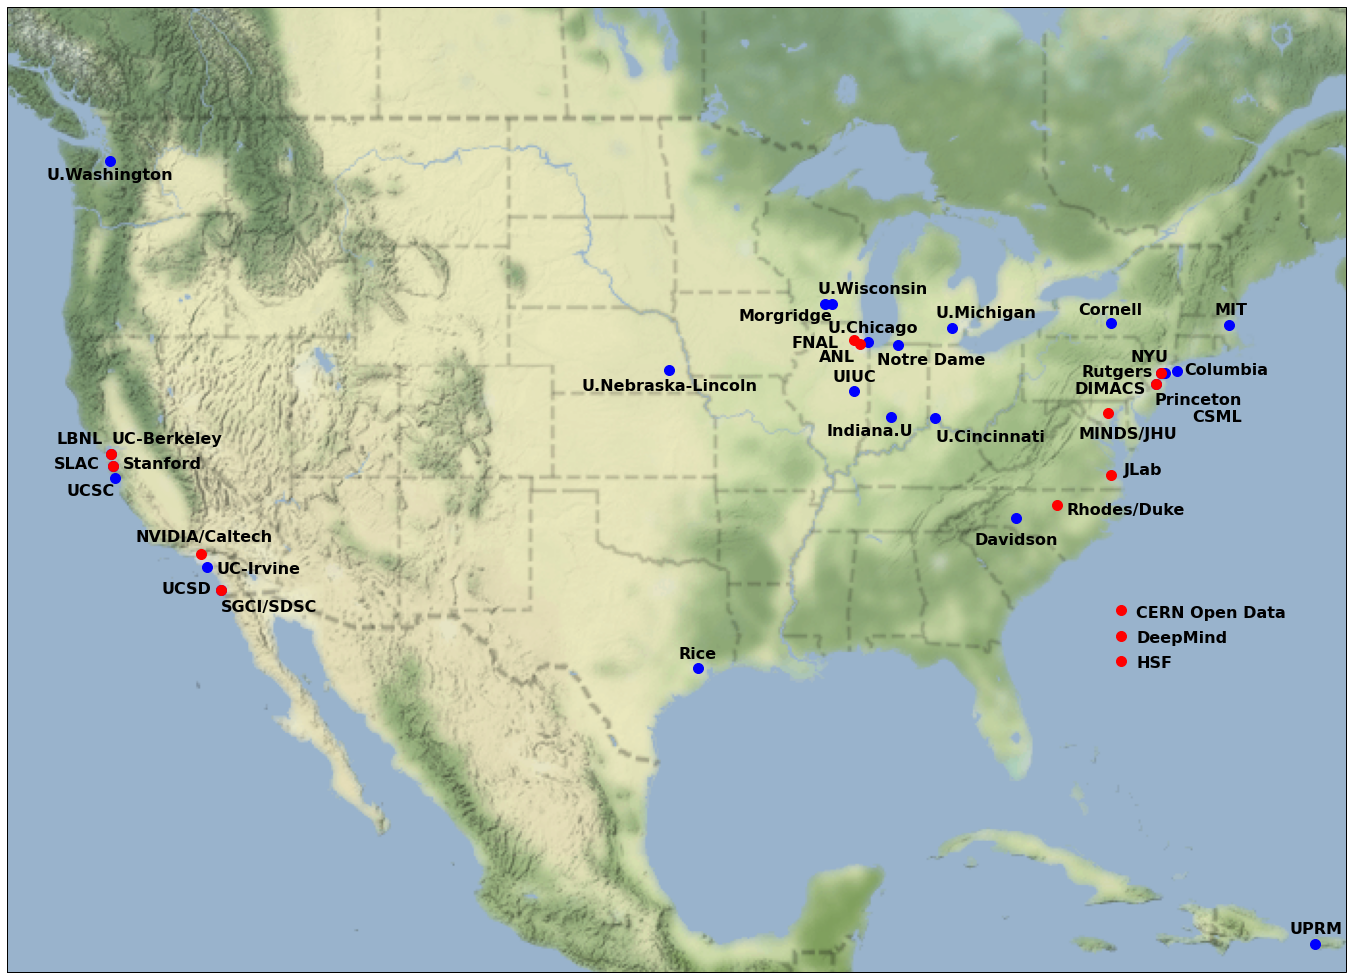

In [4]:
# Mapping IRIS-HEP and CLARIPHY institutions the United States
# This code uses a spoofing algorithm to avoid bounceback from OSM servers

def image_spoof(self, tile): # this function pretends not to be a Python script
    url = self._image_url(tile) # get the url of the street map API
    req = Request(url) # start request
    req.add_header('User-agent','Anaconda 3') # add user agent to request
    fh = urlopen(req) 
    im_data = io.BytesIO(fh.read()) # get image
    fh.close() # close url
    img = Image.open(im_data) # open image with PIL
    img = img.convert(self.desired_tile_form) # set image format
    return img, self.tileextent(tile), 'lower' # reformat for cartopy

longnames0,names0,lats0,lons0,labellats0,labellons0 = [],[],[],[],[],[]
longnames1,names1,lats1,lons1,labellats1,labellons1 = [],[],[],[],[],[]
longnames2,names2,lats2,lons2,labellats2,labellons2 = [],[],[],[],[],[]
longnames3,names3,lats3,lons3,labellats3,labellons3 = [],[],[],[],[],[]
with open('institutions.dat','r') as dat_file:
    reader = csv.reader(dat_file, delimiter='|')
    for row in reader:
        latitude = float(row[4].strip()) + float(row[5].strip())/60.0 + float(row[6].strip())/3600.0
        longitude = float(row[8].strip()) + float(row[9].strip())/60.0 + float(row[10].strip())/3600.0
        if (row[3].strip() == 'S'):
            latitude = -1.0 * latitude
        if (row[7].strip() == 'W'):
            longitude = -1.0 * longitude
        if (row[2].strip() == '0'):
            longnames0.append(row[0].strip())
            names0.append(row[1].strip())
            lats0.append(latitude)
            lons0.append(longitude)
            labellats0.append(float(row[11].strip()))
            labellons0.append(float(row[12].strip()))
        elif (row[2].strip() == '1'):
            longnames1.append(row[0].strip())
            names1.append(row[1].strip())
            lats1.append(latitude)
            lons1.append(longitude)
            labellats1.append(float(row[11].strip()))
            labellons1.append(float(row[12].strip()))
        elif (row[2].strip() == '2'):
            longnames2.append(row[0].strip())
            names2.append(row[1].strip())
            lats2.append(latitude)
            lons2.append(longitude)
            labellats2.append(float(row[11].strip()))
            labellons2.append(float(row[12].strip()))
        elif (row[2].strip() == '3'):
            longnames3.append(row[0].strip())
            names3.append(row[1].strip())
            lats3.append(latitude)
            lons3.append(longitude)
            labellats3.append(float(row[11].strip()))
            labellons3.append(float(row[12].strip()))        
        else:
            print ("ERROR")
#        print ('University = ' + row[0].strip() + '  ' + str(round(latitude,1)) + '  ' + str(round(longitude,1)))
        
#######################################
# Formatting the Cartopy plot
#######################################
#
cimgt.Stamen.get_image = image_spoof # reformat web request for street map spoofing
osm_img = cimgt.Stamen('terrain-background') # spoofed, downloaded street map
#osm_img = cimgt.Stamen('watercolor') # spoofed, downloaded street map


#fig = plt.figure(figsize=(12,9)) # open matplotlib figure
fig = plt.figure(figsize=(24,18)) # open matplotlib figure
ax1 = plt.axes(projection=osm_img.crs) # project using coordinate reference system (CRS) of street map
#ax1.set_title('IRIS-HEP and CLARIPHY Institutions',fontsize=16)
#ax1.set_title('CLARIPHY Institutions',fontsize=16)
#ax1.set_title('IRIS-HEP Institutions',fontsize=16)
#extent = [-124.7844079,-66.9513812, 24.7433195, 49.3457868] # Contiguous US bounds
extent = [-127,-65.7, 17, 48] # Contiguous US bounds including Puerto Rico
#extent = [-127,-68, 24, 46] # Continental US bounds
#extent = [-150,150, -75, 75] # Contiguous US bounds
# extent = [-74.257159,-73.699215,40.495992,40.915568] # NYC bounds
ax1.set_extent(extent) # set extents
#ax1.set_xticks(np.linspace(extent[0],extent[1],7),crs=ccrs.PlateCarree()) # set longitude indicators
#ax1.set_yticks(np.linspace(extent[2],extent[3],7)[1:],crs=ccrs.PlateCarree()) # set latitude indicators
#lon_formatter = LongitudeFormatter(number_format='0.1f',degree_symbol='',dateline_direction_label=True) # format lons
#lat_formatter = LatitudeFormatter(number_format='0.1f',degree_symbol='') # format lats
#ax1.xaxis.set_major_formatter(lon_formatter) # set lons
#ax1.yaxis.set_major_formatter(lat_formatter) # set lats
#ax1.xaxis.set_tick_params(labelsize=14)
#ax1.yaxis.set_tick_params(labelsize=14)
scale = np.ceil(-np.sqrt(2)*np.log(np.divide((extent[1]-extent[0])/2.0,350.0))) # empirical solve for scale based on zoom
scale = (scale<20) and scale or 19 # scale cannot be larger than 19
ax1.add_image(osm_img, int(scale)) # add OSM with zoom specification

#######################################
# Plot the ASOS stations as points
#######################################
#
#points0 = ax1.plot(lons0, lats0, markersize=10,marker='o',linestyle='',color='#ff0000',transform=ccrs.PlateCarree())
points0 = ax1.plot(lons0, lats0, markersize=10,marker='o',linestyle='',color='#0000ff',transform=ccrs.PlateCarree())
points1 = ax1.plot(lons1, lats1, markersize=10,marker='o',linestyle='',color='#0000ff',transform=ccrs.PlateCarree())
#points2 = ax1.plot(lons2, lats2, markersize=12,marker='*',linestyle='',color='#d012ed',transform=ccrs.PlateCarree())
points2 = ax1.plot(lons2, lats2, markersize=10,marker='o',linestyle='',color='#0000ff',transform=ccrs.PlateCarree())
points3 = ax1.plot(lons3, lats3, markersize=10,marker='o',linestyle='',color='#ff0000',transform=ccrs.PlateCarree())
#ax1.legend(['IRIS-HEP','CLARIPHY','BOTH'])
transform = ccrs.PlateCarree()._as_mpl_transform(ax1) # set transform for annotations
#ax1.text(-90.0,42.0,'FOO', {'color': 'k', 'fontsize': 8},
#                 horizontalalignment='center', verticalalignment='bottom',
#                 clip_on=False,transform=transform,bbox=dict(boxstyle="none",
#                   ec='#121212', fc='#ffffff'))
#ax1.text(-90.5,43.0,'FOO', {'color': '#000000', 'weight': 'bold', 'fontsize': 10},
#                 horizontalalignment='center', verticalalignment='bottom',
#                 clip_on=False, transform=transform)
i=0
while i < len(names0):
   ax1.text(labellons0[i],labellats0[i],names0[i], {'color': '#000000', 'weight': 'bold', 'fontsize': 16},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False, transform=transform)
   i+=1
i=0
while i < len(names1):
   ax1.text(labellons1[i],labellats1[i],names1[i], {'color': '#000000', 'weight': 'bold', 'fontsize': 16},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False, transform=transform)
   i+=1
i=0
while i < len(names2):
   ax1.text(labellons2[i],labellats2[i],names2[i], {'color': '#000000', 'weight': 'bold', 'fontsize': 16},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False, transform=transform)
   i+=1
i=0
while i < len(names3):
   ax1.text(labellons3[i],labellats3[i],names3[i], {'color': '#000000', 'weight': 'bold', 'fontsize': 16},
                 horizontalalignment='center', verticalalignment='bottom',
                 clip_on=False, transform=transform)
   i+=1
plt.show()